Team name: Neighborhood Navigators
Jhanvi Sharma - jhs92@pitt.edu
Seamus Quigley - sjq6@pitt.edu
Kace Martinez - kam793@pitt.edu



Hey everyone! Our team had the great idea of finding the best neighborhood for a superhero (Batman)! ourobjective was to find the place with the most amount of destruction so that our superhero has a ton crime to fight against. We used the following metrics: "fire incidents", " ", and " ".

Firstly we have fire incidents by Jhanvi!

Below, I am importing the pd and Geopandas.
After, we simply read in the csv

In [2]:
import pandas as pd
import geopandas
url = "8d76ac6b-5ae8-4428-82a4-043130d17b02.csv"
df = pd.read_csv(url)
df

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,12575,F240027649,150.0,"Outside rubbish fire, Other","1700 BLOCK DAGMAR AVE, PITTSBURGH PA",0,2024-04-02T13:54:21,231EN28,1920.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.408709,-80.022745
9775,12607,F240026921,111.0,Building fire,"00 BLOCK MILES AVE ING, INGRAM PA",2,2024-03-31T06:33:31,231EN31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-16A,NaN,NaN
9776,12608,F240027382,154.0,Dumpster or other outside trash receptacle fire,"5500 BLOCK 5TH AVE, PITTSBURGH PA",0,2024-04-01T23:36:09,231EN18,1402.0,Shadyside,8.0,7.0,4.200307e+10,2.0,7.0,4.0,2-17,40.448944,-79.932527
9777,12609,F240028205,150.0,"Outside rubbish fire, Other","2700 BLOCK JANE ST, PITTSBURGH PA 15120",0,2024-04-03T19:21:30,231EN24,1609.0,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.425230,-79.967811


For simplified analysis, we group th data by the "neighborhood" column. We are interested in the counted of id within each neighborhood. We are just calculating the number of occurances of "_id" within the data frame.

In [3]:
df_grouped = df.groupby("neighborhood").count()["_id"]
df_grouped = df_grouped.dropna()
df_grouped

neighborhood
Allegheny Center        62
Allegheny West          43
Allentown              127
Arlington               51
Arlington Heights       13
                      ... 
Upper Lawrenceville     52
West End                23
West Oakland            62
Westwood                28
Windgap                 23
Name: _id, Length: 91, dtype: int64

Now we will use geopandas to read in the csv that is provided to us. 

In [4]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")

We are now merging the neighborhoods data frame with our data frame. how= left means a left join, meaning all rows from "neighborhoods". lefton="hood" means this is the key column for the merge and righton = "neighborhood" uses the colum fron df_grouped.

In [5]:
steps_map = neighborhoods.merge(df_grouped, how='left', left_on='hood', right_on='neighborhood')

Geospatial visualization, where each neighborhood or area represented in the DataFrame is plotted according to the values in the _id column. 

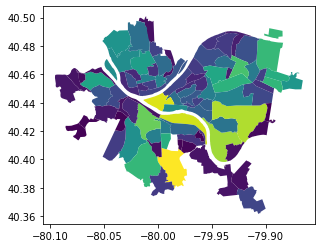

In [6]:
steps_map.head()
steps_map.sort_values("_id")
steps_map.plot(column="_id") 

Heat map:
The greater the quantity of fires, the darker the color on the map.


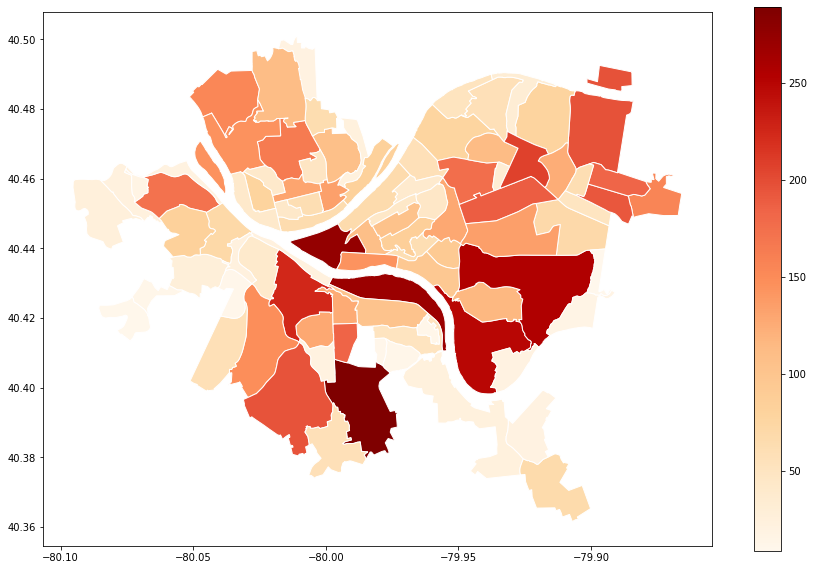

In [7]:
steps_map.plot(column='_id', # set the data to be used for coloring
               cmap='OrRd' , edgecolor="white",        # outline the districts in white
               legend=True,
               # label the legend
               figsize=(15, 10)        # set the size
              
               # choose a color palette
               )

Simplfies the data, only depicting the hood and _id colummns in a dataframe.

In [8]:
steps_map.sort_values("_id", ascending = False)[["hood", "_id"]].head()

,hood,_id
32,Carrick,289
5,Central Business District,274
13,South Side Flats,270
24,Squirrel Hill South,256
18,Hazelwood,249


Below is a bar graph showcasing the above values.

/opt/tljh/user/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:677: UserWarning: The handle <BarContainer object of 5 artists> has a label of '_id' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)


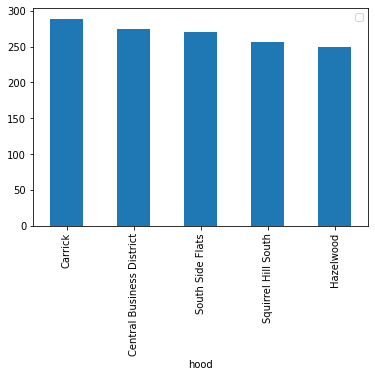

In [9]:
steps_map.sort_values("_id", ascending = False)[["hood", "_id"]].head(5).plot(kind="bar", x="hood")

Overall, after filtering a and sorting this database on the fire incidents, I can conclude that the best neighborhood for a superhero would be Carrick. Carrick has has the most fires, and therefore gives our superhero the most amount of danger to fight against!